<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [5]:
## Write your code here
print(df.columns)
print(df.info())
print(df.describe())

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [8]:
## Write your code here
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in each column:")
print(missing_values.sort_values(ascending=False))
# Impute categorical columns
df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# Impute numerical column
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

# Drop columns with more than 50% missing data
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]



Missing values in each column:
AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64


In [11]:
df['CompTotal'] = df['CompTotal'].fillna(df['CompTotal'].median())

# Impute categorical columns with a placeholder
df['MiscTechWantToWorkWith'] = df['MiscTechWantToWorkWith'].ffill
df['PlatformWantToWorkWith'] = df['PlatformWantToWorkWith'].ffill
df['WebframeAdmired'] = df['WebframeAdmired'].ffill
df['AIToolCurrently Using'] = df['AIToolCurrently Using'].ffill



In [12]:
# Confirm that missing values are handled
print(df[['CompTotal', 'MiscTechWantToWorkWith', 'PlatformWantToWorkWith', 'WebframeAdmired', 'AIToolCurrently Using']].isnull().sum())


CompTotal                 0
MiscTechWantToWorkWith    0
PlatformWantToWorkWith    0
WebframeAdmired           0
AIToolCurrently Using     0
dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [15]:
print("Employment Status:")
print(df['Employment'].value_counts(dropna=False))
print("\n")

print("Job Satisfaction:")
print(df['JobSat'].value_counts(dropna=False))
print("\n")

print("Years of Professional Coding Experience:")
print(df['YearsCodePro'].value_counts(dropna=False).sort_index())


Employment Status:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


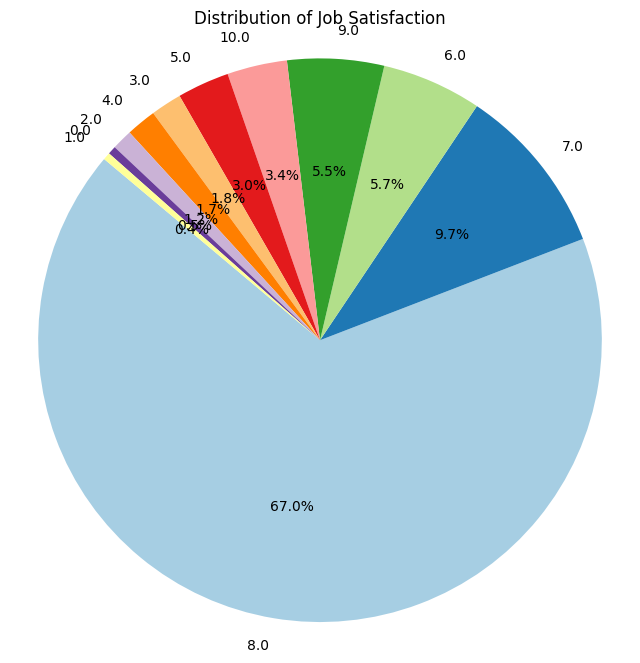

In [17]:
## Write your code here
job_sat_counts = df['JobSat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Job Satisfaction')
plt.axis('equal') 
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


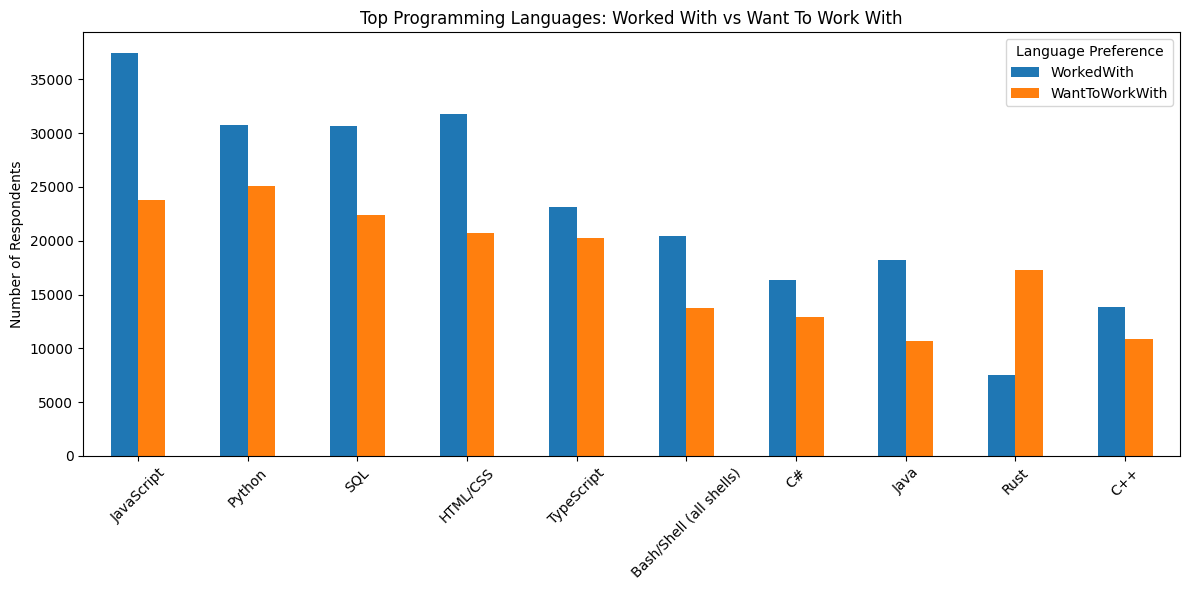

In [18]:
## Write your code here
worked = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
wanted = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

worked_counts = worked.value_counts()
wanted_counts = wanted.value_counts()

lang_df = pd.concat([worked_counts, wanted_counts], axis=1)
lang_df.columns = ['WorkedWith', 'WantToWorkWith']
lang_df = lang_df.fillna(0).astype(int)

top_languages = lang_df.sum(axis=1).sort_values(ascending=False).head(10)
lang_df_top = lang_df.loc[top_languages.index]

lang_df_top.plot(kind='bar', figsize=(12, 6))
plt.title('Top Programming Languages: Worked With vs Want To Work With')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Language Preference')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


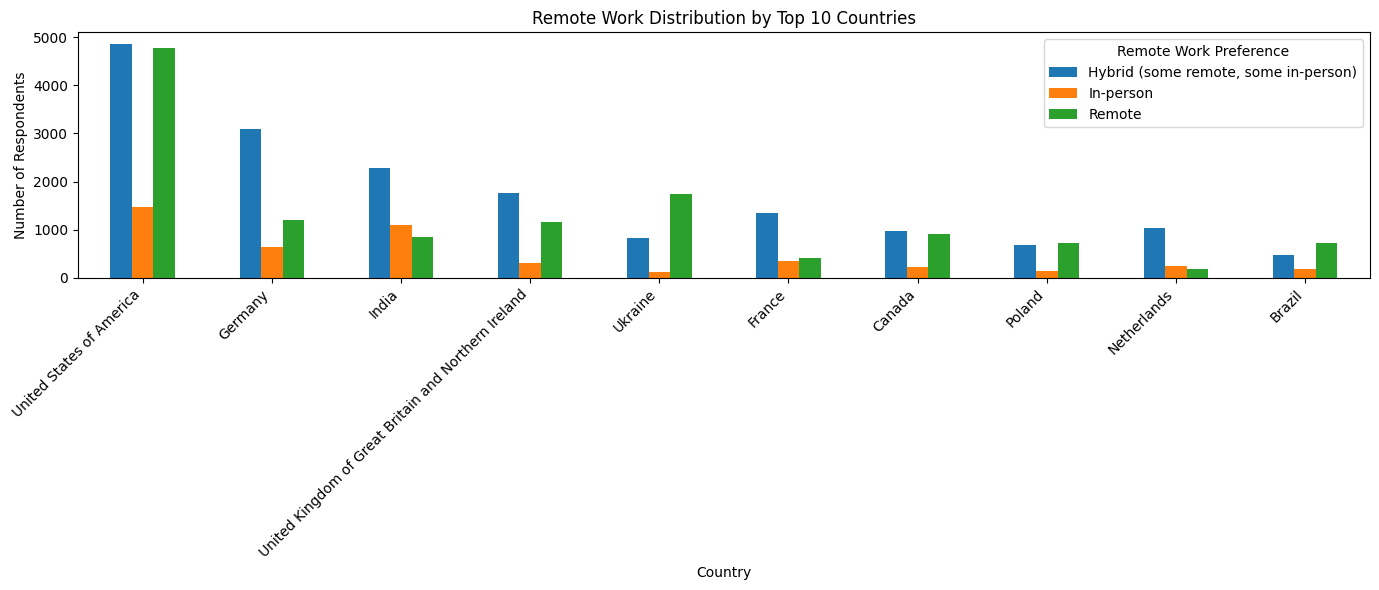

In [19]:
## Write your code here
remote_data = df[['RemoteWork', 'Country']].dropna()

remote_grouped = remote_data.groupby(['Country', 'RemoteWork']).size().unstack().fillna(0)

remote_grouped = remote_grouped.loc[remote_grouped.sum(axis=1).sort_values(ascending=False).head(10).index]

remote_grouped.plot(kind='bar', figsize=(14, 6))
plt.title('Remote Work Distribution by Top 10 Countries')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Preference')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [21]:
## Write your code here
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df_corr = df[['YearsCodePro', 'JobSat']].dropna()
pearson_corr = df_corr.corr(method='pearson')

spearman_corr = df_corr.corr(method='spearman')

print(" Pearson Correlation:\n", pearson_corr)
print("\n Spearman Correlation:\n", spearman_corr)

 Pearson Correlation:
               YearsCodePro    JobSat
YearsCodePro      1.000000  0.064585
JobSat            0.064585  1.000000

 Spearman Correlation:
               YearsCodePro    JobSat
YearsCodePro      1.000000  0.057422
JobSat            0.057422  1.000000


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


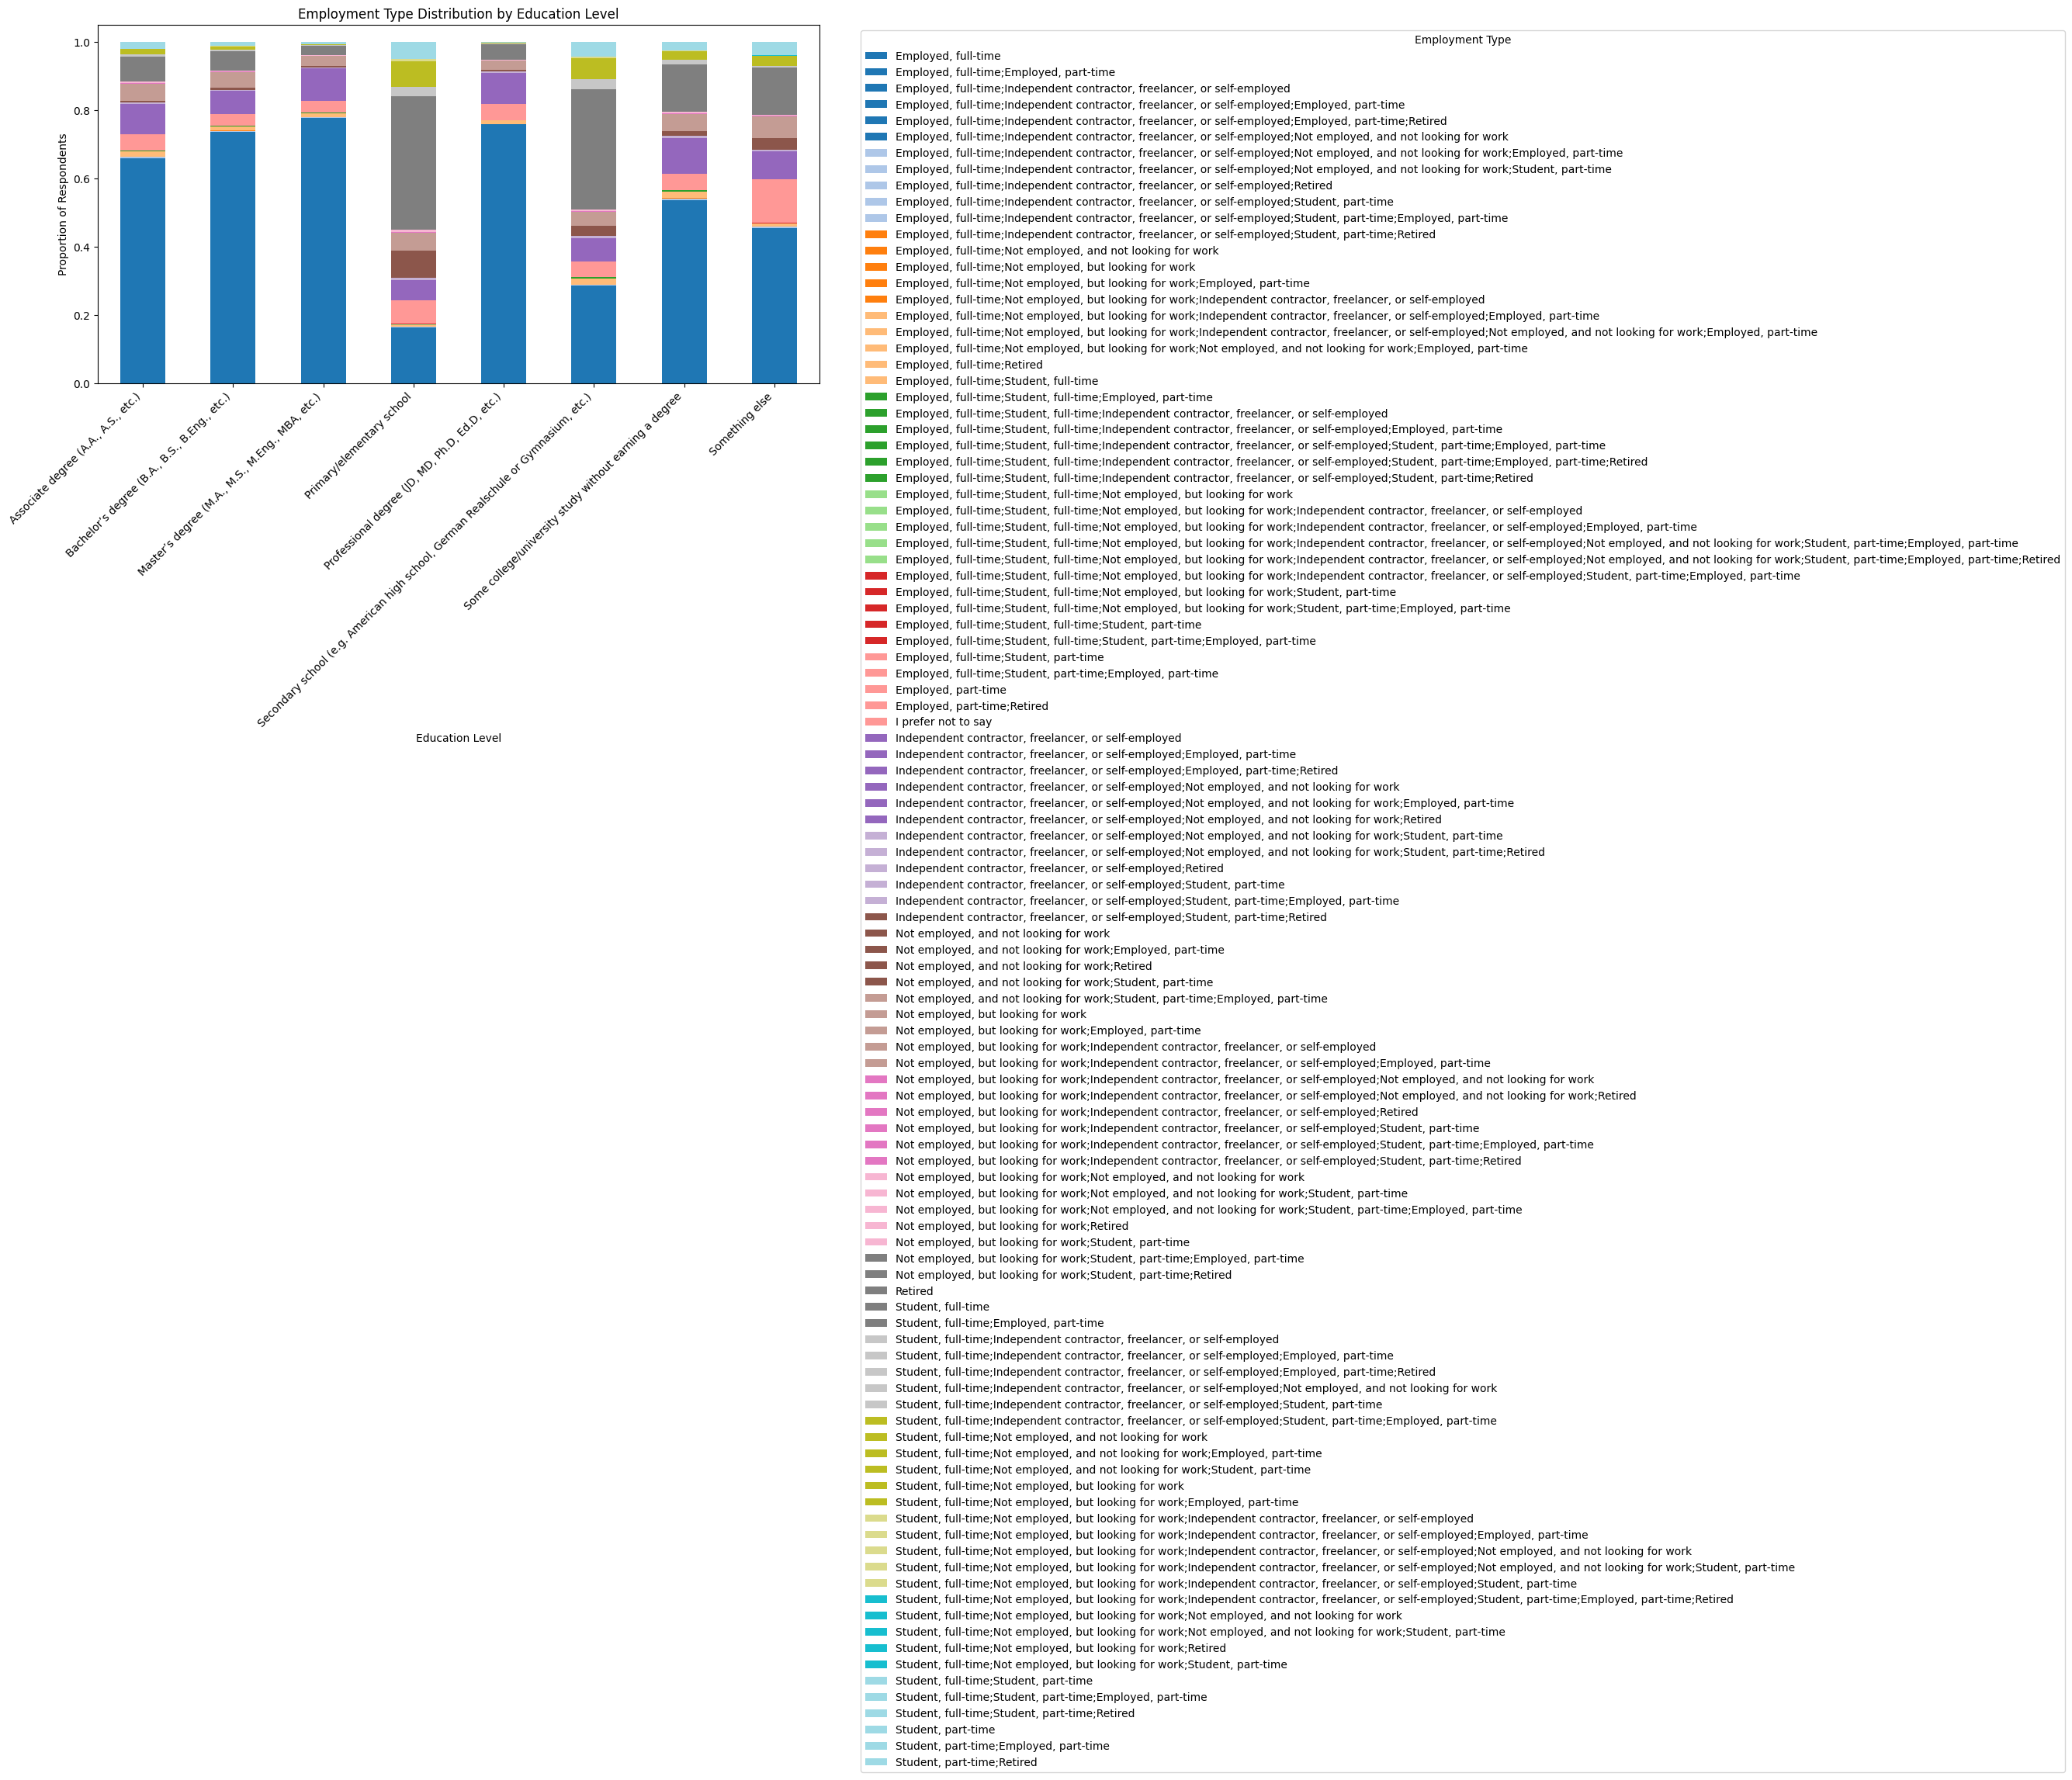

In [24]:
## Write your code here
employment_edu_df = df[['Employment', 'EdLevel']].dropna()

crosstab = pd.crosstab(employment_edu_df['EdLevel'], employment_edu_df['Employment'])
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Employment Type Distribution by Education Level')
plt.ylabel('Proportion of Respondents')
plt.xlabel('Education Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('cleaned_stackoverflow_survey.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
